### Importing the libraries:

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans

### Importing the data:

In [68]:
raw_data = pd.read_csv("crime_data.csv")
raw_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8


### Checking if there are any null values:

In [69]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Processing the Data:

In [70]:
# naming the 1st column as it is unnamed
raw_data.rename(columns={"Unnamed: 0": "States"}, inplace=True)
raw_data

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8


In [71]:
# Adding a Total_crime col to see the relationship with the cluster
raw_data["Total_crime"] = raw_data.Murder + raw_data.Assault + raw_data.Rape
raw_data

,States,Murder,Assault,UrbanPop,Rape,Total_crime
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5
2,Arizona,8.1,294,80,31.0,333.1
3,Arkansas,8.8,190,50,19.5,218.3
4,California,9.0,276,91,40.6,325.6
...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,185.2
46,Washington,4.0,145,73,26.2,175.2
47,West Virginia,5.7,81,39,9.3,96.0
48,Wisconsin,2.6,53,66,10.8,66.4


### Building the Hierarchial clustering model:

#### Trying by Normalizing the Data:

In [72]:
# Normalizing the data
data_norm = preprocessing.normalize(raw_data.iloc[:,1:5])
data_norm = pd.DataFrame(data_norm)
data_norm

,0,1,2,3
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
...,...,...,...,...
45,0.050082,0.919147,0.371194,0.121964
46,0.024318,0.881521,0.443800,0.159282
47,0.062942,0.894442,0.430657,0.102695
48,0.030455,0.620812,0.773086,0.126505


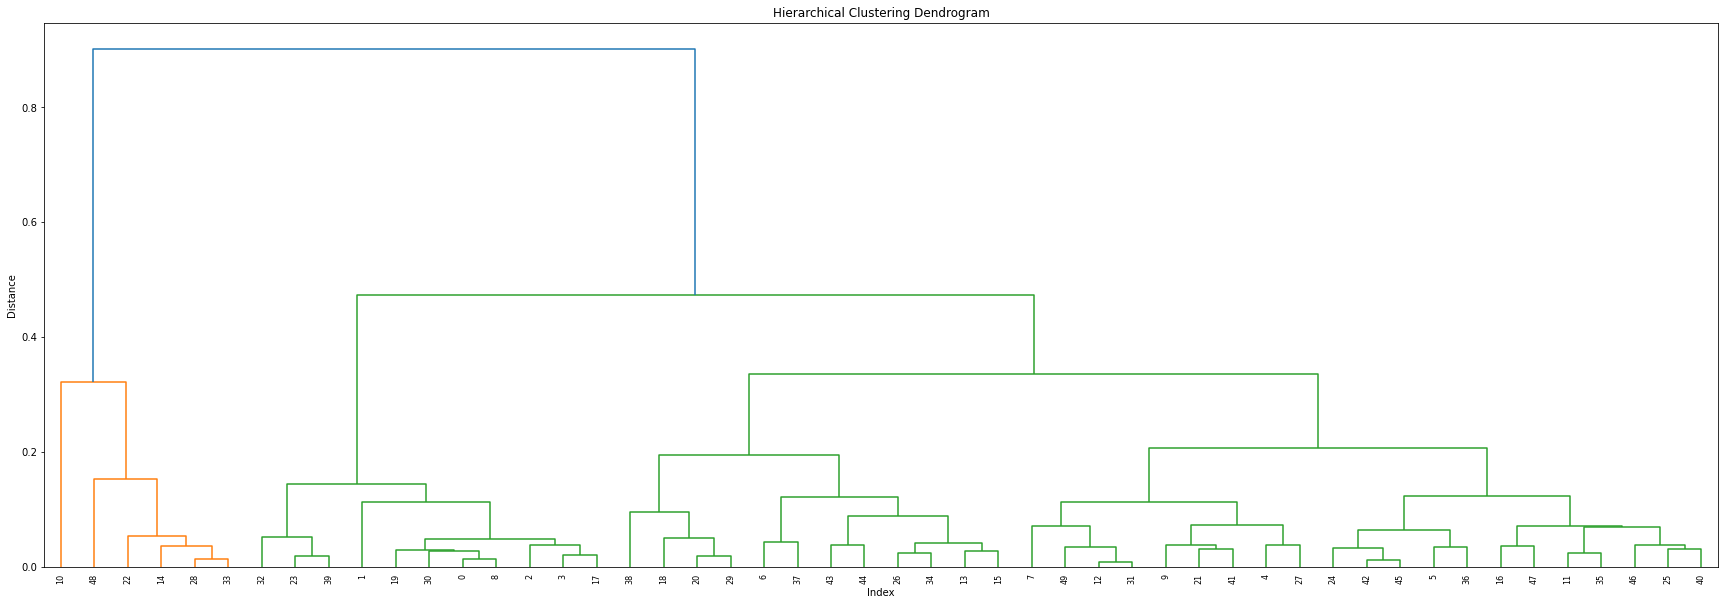

In [73]:
z = linkage(data_norm, method="complete",metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [74]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(data_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
raw_data['clust']=cluster_labels 
raw_data.head(10)

,States,Murder,Assault,UrbanPop,Rape,Total_crime,clust
0,Alabama,13.2,236,58,21.2,270.4,2
1,Alaska,10.0,263,48,44.5,317.5,2
2,Arizona,8.1,294,80,31.0,333.1,2
3,Arkansas,8.8,190,50,19.5,218.3,2
4,California,9.0,276,91,40.6,325.6,0
5,Colorado,7.9,204,78,38.7,250.6,0
6,Connecticut,3.3,110,77,11.1,124.4,1
7,Delaware,5.9,238,72,15.8,259.7,0
8,Florida,15.4,335,80,31.9,382.3,2
9,Georgia,17.4,211,60,25.8,254.2,0


In [75]:
raw_data.iloc[:,1:].groupby(raw_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,Total_crime,clust
clust,,,,,,
0,8.547619,180.142857,67.047619,24.452381,213.142857,0.0
1,4.758333,116.583333,70.083333,15.683333,137.025000,1.0
2,12.463636,275.181818,59.636364,25.990909,313.636364,2.0
3,2.080000,56.600000,57.800000,10.760000,69.440000,3.0
4,5.300000,46.000000,83.000000,20.200000,71.500000,4.0


#### Trying by standardizing the data:

In [76]:
scaler = preprocessing.StandardScaler()
data_sc = scaler.fit_transform(raw_data.iloc[:,1:5])
data_sc = pd.DataFrame(data_sc)
data_sc

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
...,...,...,...,...
45,0.165131,-0.178909,-0.177259,-0.057376
46,-0.878533,-0.312242,0.520612,0.535792
47,-0.484260,-1.087999,-1.852151,-1.286851
48,-1.203228,-1.427393,0.032102,-1.125078


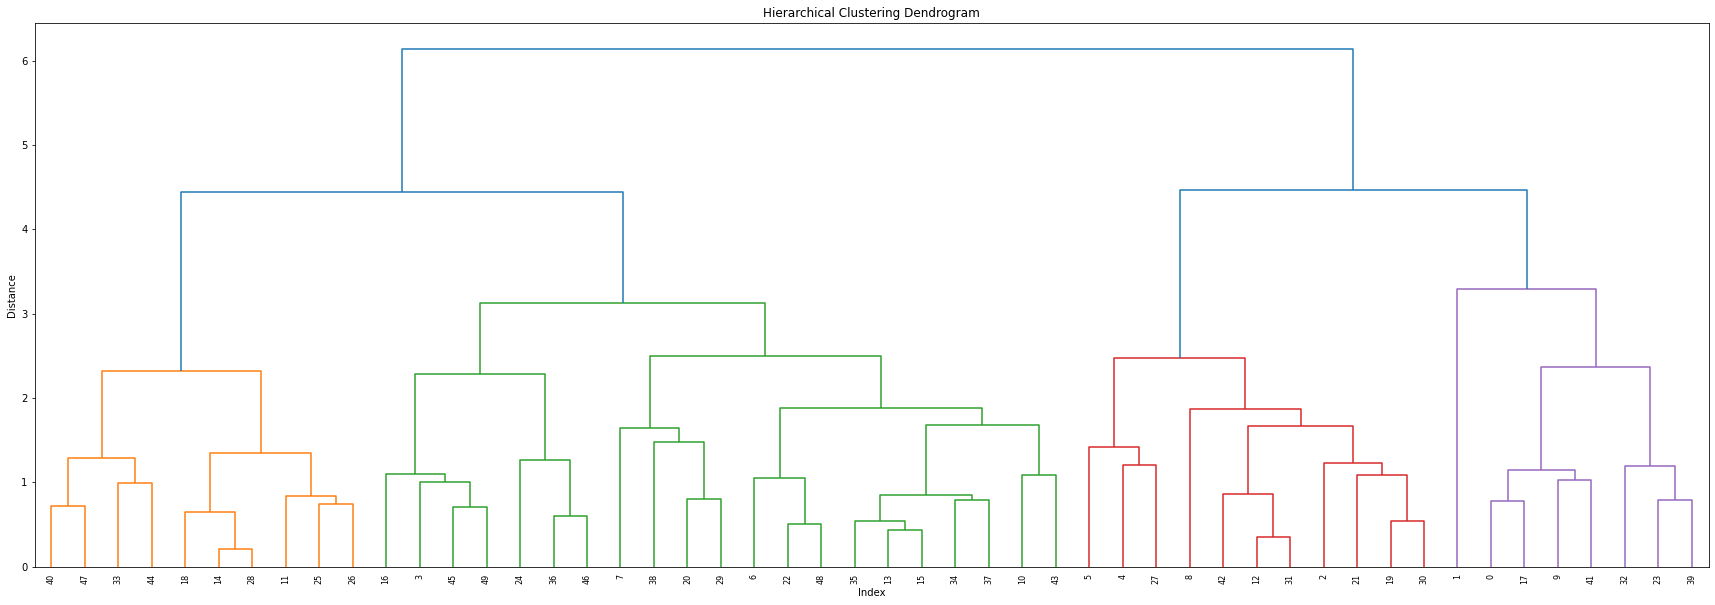

In [77]:
z = linkage(data_sc, method="complete",metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [78]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(data_sc) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
raw_data['clust2']=cluster_labels 
raw_data

,States,Murder,Assault,UrbanPop,Rape,Total_crime,clust,clust2
0,Alabama,13.2,236,58,21.2,270.4,2,1
1,Alaska,10.0,263,48,44.5,317.5,2,4
2,Arizona,8.1,294,80,31.0,333.1,2,2
3,Arkansas,8.8,190,50,19.5,218.3,2,0
4,California,9.0,276,91,40.6,325.6,0,2
...,...,...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,185.2,0,0
46,Washington,4.0,145,73,26.2,175.2,0,0
47,West Virginia,5.7,81,39,9.3,96.0,0,3
48,Wisconsin,2.6,53,66,10.8,66.4,3,0


### Building The KMeans clustering model:

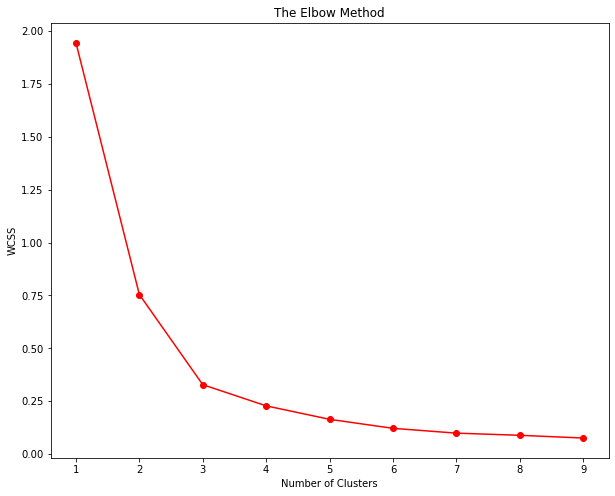

In [79]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 10):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 10), WCSS, "o-r")
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

###### Observation: We can see that the elbow is at 5th iteration and the sse is not dropping much after that. So the optimal number if K here would be 5

In [80]:
# Building and predicting the model
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data_norm)

In [82]:
predicted = pd.Series(y_kmeans)
raw_data['K_clust'] = predicted 
raw_data

,States,Murder,Assault,UrbanPop,Rape,Total_crime,clust,clust2,K_clust
0,Alabama,13.2,236,58,21.2,270.4,2,1,0
1,Alaska,10.0,263,48,44.5,317.5,2,4,0
2,Arizona,8.1,294,80,31.0,333.1,2,2,0
3,Arkansas,8.8,190,50,19.5,218.3,2,0,0
4,California,9.0,276,91,40.6,325.6,0,2,0
...,...,...,...,...,...,...,...,...,...
45,Virginia,8.5,156,63,20.7,185.2,0,0,2
46,Washington,4.0,145,73,26.2,175.2,0,0,2
47,West Virginia,5.7,81,39,9.3,96.0,0,3,2
48,Wisconsin,2.6,53,66,10.8,66.4,3,0,4


In [106]:
raw_data.iloc[:,1:6].groupby(raw_data["K_clust"]).mean()

,Murder,Assault,UrbanPop,Rape,Total_crime
K_clust,,,,,
0,12.021053,260.526316,66.421053,27.694737,300.242105
1,4.881818,111.363636,68.545455,16.354545,132.600000
2,6.542857,145.285714,63.500000,20.107143,171.935714
3,5.300000,46.000000,83.000000,20.200000,71.500000
4,2.080000,56.600000,57.800000,10.760000,69.440000


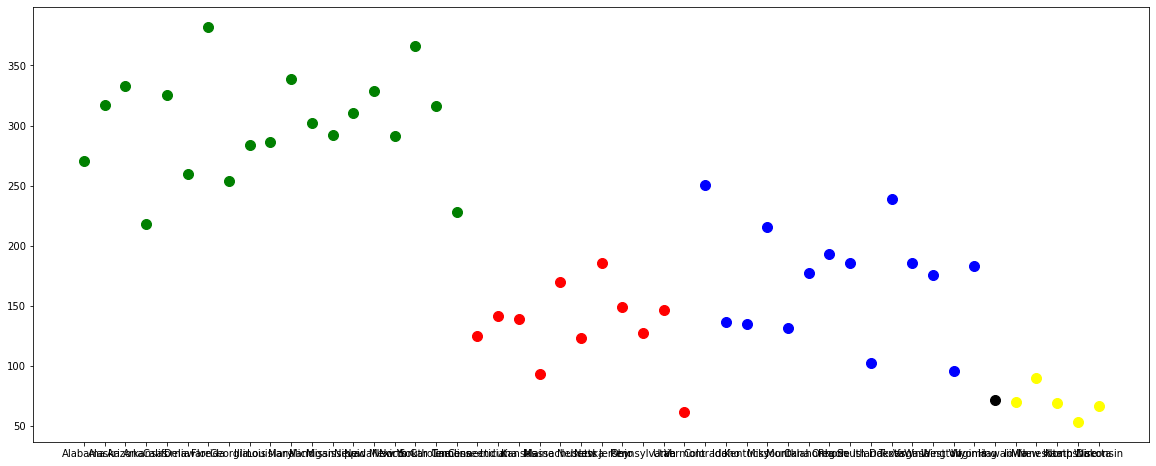

In [110]:
# plt.rcParams["figure.figsize"] = (20,8)
df0 = raw_data[raw_data.K_clust==0]
df1 = raw_data[raw_data.K_clust==1]
df2 = raw_data[raw_data.K_clust==2]
df3 = raw_data[raw_data.K_clust==3]
df4 = raw_data[raw_data.K_clust==4]
plt.scatter(df0.States, df0.Total_crime,s=100, color="green")
plt.scatter(df1.States, df1.Total_crime,s=100, color="red")
plt.scatter(df2.States, df2.Total_crime,s=100, color="blue")
plt.scatter(df3.States, df3.Total_crime,s=100, color="black")
plt.scatter(df4.States, df4.Total_crime,s=100, color="yellow")

##### Conclusion: We can see that the States in the First Cluster labeled 0 (green) have the highest crime rate and the states in the 5th cluster labeled 4 (yellow) have the least crime rate  